In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
cd ..

/media/xwan/HDD2/Projects/postNAS


In [5]:
import pickle
import matplotlib.pyplot as plt

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [7]:
import networkx as nx
import numpy as np
from tqdm import tqdm
import seaborn as sns

In [8]:
sns.set_style('whitegrid')

In [9]:
from collections import OrderedDict

In [10]:
shorthand = OrderedDict({
    'sep_conv_3x3': 's3',
    'sep_conv_5x5': 's5',
    'dil_conv_3x3': 'd3',
    'dil_conv_5x5': 'd5',
    'skip_connect': 'skip',
    'max_pool_3x3': 'mp3',
    'avg_pool_3x3': 'ap3',
    '': '',
})

In [11]:
OPS = [
        'max_pool_3x3',
        'avg_pool_3x3',
        'skip_connect',
        'sep_conv_3x3',
        'sep_conv_5x5',
        'dil_conv_3x3',
        'dil_conv_5x5',
        'none'
       ]
AUGMENTED_OPS = ['input1', 'input2'] + OPS + ['add', 'output']  # all possible cell op types including the non-op ones

In [12]:
from tqdm import tqdm

In [33]:
# normal only
res = pickle.load(open('output/gSpan_nb301_top_arch_info_with_importance_minSupport_0.05_nodes_2_6_thres_geq_0.001_normalOnly_.pickle', 'rb'))

In [34]:
# add the normalised support
normalised_support = res['report_df']['support'].values / (res['report_df']['ref_incidence'].values + 0.0)
res['report_df']['act_support'] = res['report_df']['support'].values / 2589   # 2589 is the total number of top architectures included
res['report_df']['ref_incidence'] = res['report_df']['ref_incidence'] / 2589
res['report_df']['norm_support'] = normalised_support


In [35]:
sorted_df = res['report_df'].sort_values(by=['norm_support'], ascending=False)
sorted_df

,support,description,num_vert,ref_incidence,act_support,norm_support
15,211,v 0 input2 v 1 op v 2 op v 3 op v 4 op e 0 1 s...,5,0.000386,0.081499,211.000000
31,174,v 0 input1 v 1 op v 2 op v 3 op e 0 1 sep_conv...,4,0.000772,0.067207,87.000000
9,150,v 0 input2 v 1 op v 2 op v 3 op e 0 1 skip_con...,4,0.000772,0.057937,75.000000
32,144,v 0 input1 v 1 op v 2 op v 3 op e 0 1 sep_conv...,4,0.000772,0.055620,72.000000
18,193,v 0 input2 v 1 op v 2 op v 3 op v 4 op e 0 1 s...,5,0.001159,0.074546,64.333333
3,568,v 0 input1 v 1 op v 2 op v 3 op e 0 1 skip_con...,4,0.004249,0.219390,51.636364
8,619,v 0 input2 v 1 op v 2 op v 3 op e 0 1 skip_con...,4,0.005794,0.239088,41.266667
30,556,v 0 input1 v 1 op v 2 op e 0 1 sep_conv_3x3e 1...,3,0.009656,0.214755,22.240000
13,489,v 0 input2 v 1 op v 2 op v 3 op e 0 1 sep_conv...,4,0.008884,0.188876,21.260870
17,267,v 0 input2 v 1 op v 2 op v 3 op e 0 1 sep_conv...,4,0.005407,0.103129,19.071429


In [13]:
sorted_args = np.argsort(res['report_df']['norm_support'].values)[::-1]

In [14]:
node_color_configs = {
    'input1': 'orange',
    'input2': 'orange',
    'op': 'lightblue',
    "": 'lightblue'
}

In [15]:
import seaborn as sns
cplate = sns.color_palette("Set2", 8)
cplate = cplate.as_hex()
# cplate[4] = cplate[-1]
# cplate = cplate[:-1]
edge_color_configs = {k: cplate[i] for i, k in enumerate(shorthand.values())}

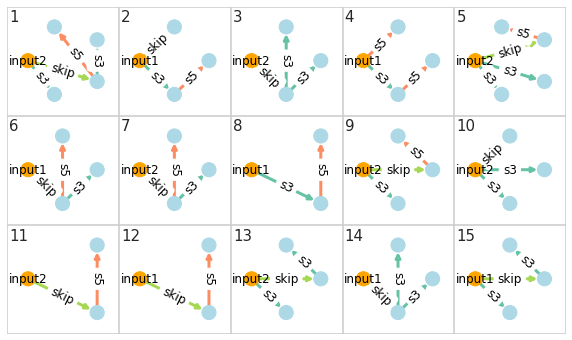

In [28]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


plt.subplots(3, 5, gridspec_kw = {'wspace':0.01, 'hspace':0.01}, figsize=[10, 6],)


for i in range(res['report_df'].shape[0]):
    if i >= 15:
        break
    idx = sorted_args[i]
    nx_graph = res['subgraphs_nx'][idx]
    labels = {}
    edge_labels = {}
    plt.subplot(3, 5, i+1,)
    for node, data in nx_graph.nodes(data=True):
        op_name = data['label']
        if op_name == 'op':
            nx_graph.nodes[node]['op_name'] = ''
        else:
            nx_graph.nodes[node]['op_name'] = op_name

#         if op_name == 0: labels[node] = 'input1'
#         elif op_name == 1: labels[node] = 'input2'
#         elif op_name == 6: labels[node] = 'output'
#         else: labels[node] = op_name - 2
        labels[node] = '' if op_name == 'op' else op_name
    for ni, no, data in nx_graph.edges(data=True):
        op_name = data['label']
        try:
            nx_graph.edges[(ni, no)]['op_name'] = shorthand[op_name]
            edge_labels[(ni, no)] = shorthand[op_name]
        except IndexError:
            nx_graph.edges[(ni, no)]['op_name'] = ''
            edge_labels[(ni, no)] = ''
    pos = nx.shell_layout(nx_graph)
    node_colors = [node_color_configs[dat['op_name']] for n, dat in nx_graph.nodes(data=True)]
#     edge_colors = {(ni, no): edge_color_configs[dat['op_name']] for ni, no, dat in nx_graph.edges(data=True)}
    edge_colors = [edge_color_configs[dat['op_name']] for ni, no, dat in nx_graph.edges(data=True)]
    nx.draw_networkx(nx_graph, pos, arrows=True, with_labels=True, labels=labels, node_color=node_colors, edge_color=edge_colors, node_size=200, width=3,)
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=12)
    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.3
    plt.xlim(x_min - x_margin, x_max + x_margin)
#     print(x_min, x_max)
    y_max, y_min = max(y_values), min(y_values)
    y_margin = (y_max - y_min) * 0.3
    plt.ylim(y_min - y_margin, y_max + y_margin)
    plt.annotate(f'{i+1}', (x_min-0.9*x_margin, y_max+0.25*y_margin), )
#     plt.title(f"$\\tilde{{sup}}_{{g^f_i}}$={np.round(res['report_df']['norm_support'].values[idx], 2)}")
#     plt.title(f'Normalized support={normalized_support[idx]}')
#     plt.show()
    plt.grid(False)
# plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('./figs/good_subgraphs2.pdf', dpi=200, bbox_inches='tight')

In [11]:
sorted_df = res['report_df'].sort_values(by=['norm_support'], ascending=False)
sorted_df

,support,description,num_vert,ref_incidence,norm_support
7,619,v 0 input2 v 1 op v 2 op v 3 op e 0 1 skip_con...,4,96,6.447917
3,568,v 0 input1 v 1 op v 2 op v 3 op e 0 1 skip_con...,4,100,5.680000
20,557,v 0 input1 v 1 op v 2 op e 0 1 sep_conv_3x3e 1...,3,159,3.503145
4,869,v 0 input1 v 1 op v 2 op e 0 1 skip_connecte 1...,3,249,3.489960
8,1479,v 0 input2 v 1 op v 2 op e 0 1 skip_connecte 1...,3,443,3.338600
6,1088,v 0 input2 v 1 op v 2 op e 0 1 skip_connecte 1...,3,428,2.542056
11,489,v 0 input2 v 1 op v 2 op v 3 op e 0 1 sep_conv...,4,193,2.533679
12,364,v 0 input2 v 1 op v 2 op v 3 op e 0 1 sep_conv...,4,144,2.527778
2,900,v 0 input1 v 1 op v 2 op e 0 1 skip_connecte 1...,3,413,2.179177
19,563,v 0 input1 v 1 op v 2 op e 0 1 sep_conv_3x3e 0...,3,328,1.716463
